## Introduction

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. 
In logistic regression we assumed that the labels were binary: $y^{(i)} \in \{0,1\}$. We used such a classifier to distinguish between two kinds of hand-written digits. 
Softmax regression allows us to handle $y^{(i)} \in \{1,\ldots,K\}$ where K is the number of classes.Recall that in logistic regression, we had a training
set $\{ (x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)}) \}$ of m labeled examples, where the input features are $x^{(i)} \in \Re^{n}$. With logistic regression, we were in the binary classification setting, 
so the labels were $y^{(i)} \in \{0,1\}$. Our hypothesis took the form:

\begin{align}
h_\theta(x) = \frac{1}{1+\exp(-\theta^\top x)}
\end{align}

and the model parameters θ were trained to minimize the cost function
\begin{align}
J(\theta) = -\left[ \sum_{i=1}^m y^{(i)} \log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)})) \right]
\end{align}
In the softmax regression setting, we are interested in multi-class classification (as opposed to only binary classification), and so the label y can take on K different values, rather than only two. Thus, in our training set $\{ (x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)}) \}$, we now have that $y^{(i)} \in \{1, 2, \ldots, K\}$. (Note that our convention will be to index the classes starting from 1, rather than from 0.) For example, in the MNIST digit recognition task, we would have K=10 different classes.

Given a test input x, we want our hypothesis to estimate the probability that $P(y=k | x)$ for each value of k=1,…,K. I.e., we want to estimate the probability of the class label taking on each of the K different possible values. Thus, our hypothesis will output a K-dimensional vector (whose elements sum to 1) giving us our K estimated probabilities. Concretely, our hypothesis $h_\theta(x)$ takes the form:

\begin{align}
h_\theta(x) =
\begin{bmatrix}
P(y = 1 | x; \theta) \\
P(y = 2 | x; \theta) \\
\vdots \\
P(y = K | x; \theta)
\end{bmatrix}
\end{align}

\begin{align}
=\frac{1}{ \sum_{j=1}^{K}{\exp(\theta^{(j)\top} x) }}
\begin{bmatrix}
\exp(\theta^{(1)\top} x ) \\
\exp(\theta^{(2)\top} x ) \\
\vdots \\
\exp(\theta^{(K)\top} x ) \\
\end{bmatrix}
\end{align}

Here $\theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(K)} \in \Re^{n}$ are the parameters of our model. Notice that the term $\frac{1}{ \sum_{j=1}^{K}{\exp(\theta^{(j)\top} x) } }$ normalizes the distribution, so that it sums to one.

For convenience, we will also write $\theta$ to denote all the parameters of our model. When you implement softmax regression, it is usually convenient to represent θ as a n-by-K matrix obtained by concatenating $\theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(K)} $ into columns, so that

\begin{align}
\theta = \left[\begin{array}{cccc}| & | & | & | \\
\theta^{(1)} & \theta^{(2)} & \cdots & \theta^{(K)} \\
| & | & | & 1 \end{array}\right]
\end{align}

## 公式推导

Let’s look at one more example of a GLM. Consider a classification problem in which the response variable y can take on any one of k values, so y ∈ {1, 2, . . . , k}. For example, rather than classifying email into the two classes
spam or not-spam—which would have been a binary classification problem we might want to classify it into three classes, such as spam, personal mail, and work-related mail. The response variable is still discrete, but can now take on more than two values. We will thus model it as distributed according to a multinomial distribution.

Let’s derive a GLM for modelling this type of multinomial data. To do so, we will begin by expressing the multinomial(多项的) as an exponential family distribution.

To parameterize a multinomial over k possible outcomes, one could use k parameters $φ_1 , . . . , φ_k$ specifying the probability of each of the outcomes.However, these parameters would be redundant, or more formally, they would not be independent (since knowing any
 k − 1 of the $φ_i$ ’s uniquely determines the last one, as they must satisfy $\sum_{i=1}^k\phi_i=1)$. So, we will instead parameterize the multinomial with only k−1 parameters,$ \phi_1 , . . . , \phi_{k−1} $, where $\phi_i = p(y = i; \phi)$, and $ p(y = k;\phi) = 1 −\sum_{i=1}^{k-1}\phi_i $. For notational convenience,
we will also let $\phi_k = 1 −\sum_{i=1}^{k-1}\phi_i$, but we should keep in mind that this is not a parameter, and that it is fully specified by $\phi_1 , . . . , \phi_{k−1}$ .
To express the multinomial as an exponential family distribution, we will define $T (y) \in \mathbb{R}^{k−1}$ as follows:

\begin{align}
T(1)=\begin{bmatrix}
1 \\
0 \\
0 \\
\vdots \\
0 \end{bmatrix},
T(2)=\begin{bmatrix}
0 \\
1 \\
0 \\
\vdots \\
0 \end{bmatrix},
T(3)=\begin{bmatrix}
0 \\
0 \\
1 \\
\vdots \\
0 \end{bmatrix},
\cdots,
T(k-1)=\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
1 \end{bmatrix},
T(k)=\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
0 \end{bmatrix}
\end{align}

Unlike our previous examples, here we do not have T (y) = y; also, T (y) is now a k − 1 dimensional vector, rather than a real number. We will write $(T (y))_i$ to denote the i-th element of the vector T (y).

We introduce one more very useful piece of notation. An indicator function 1{·} takes on a value of 1 if its argument is true, and 0 otherwise(1{True} = 1, 1{False} = 0). For example, 1{2 = 3} = 0, and 1{3 =5 − 2} = 1. So, we can also write the relationship between T (y) and y as $(T (y))_i = 1\begin{Bmatrix}y=i\end{Bmatrix}$. (Before you continue reading, please make sure you understand why this is true!) Further, we have that $E[(T (y))_i] = P (y = i) = \phi_i$ .

We are now ready to show that the multinomial is a member of the exponential family. We have:

\begin{align}
p(y;\phi)=\phi_1^{1 \left\{ y=1 \right\}}\phi_2^{1 \left\{ y=2 \right\}}\cdots\phi_k^{1 \left\{ y=k \right\}}
=\phi_1^{1 \left\{ y=1 \right\}}\phi_2^{1 \left\{ y=2 \right\}}\cdots\phi_k^{1 -\sum_{i=1}^{k-1}1\left\{y=i\right\}}
=\phi_1^{(T(y))_1}\phi_2^{(T(y))_2}\cdots\phi_k^{1 -\sum_{i=1}^{k-1}(T(y))_i}
\end{align}

\begin{align}
= exp((T(y))_1log(\phi_1/\phi_k)+exp((T(y))_1log(\phi_2/\phi_k)+\cdots+exp((T(y))_{k-1}log(\phi_{k-1}/\phi_k)+log(\phi_k))
=b(y)exp(\eta^TT(y)-a(\eta))
\end{align}

where

\begin{align}
\eta = \begin{bmatrix}
log(\phi_1/\phi_k)\\
log(\phi_2/\phi_k)\\
\vdots\\
log(\phi_{k-1}/\phi_k) \end{bmatrix},
a(\eta) = -log(\phi_k),
b(y) = 1
\end{align}

This completes our formulation of the multinomial as an exponential family distribution.The link function is given (for i = 1, . . . , k) by

$\eta_i = log\frac{\phi_i}{\phi_k}$
For convenience, we have also defined $η_k = log(φ_k/φ_k ) = 0.$ To invert the link function and derive the response function, we therefore have that


\begin{align}
e^{\eta_i} = \frac {\phi_i} {\phi_k},
\phi_ke^{\eta_i} = \phi_i,
\phi_k\sum_{i=1}^ke^{\eta_i}=\sum_{i=1}^k\phi_i=1
\end{align}

This implies that $\phi_k=1/\sum_{i=1}^ke^{\eta_i}$, which can be substituted back into  to give the response function

\begin{align}
\phi_k=\frac {e^{\eta_i}}{\sum_{i=1}^ke^{\eta_i}}
\end{align}

This function mapping from the $\eta$’s to the $\phi$’s is called the softmax function.

To complete our model, we use Assumption 3, given earlier, that the $\eta_i$’s
are linearly related to the x’s. So, have $\eta_i = \theta_i^T x (for i = 1, . . . , k − 1)$,
where $\theta_1, . . . , \theta_k−1 \in \mathbb{R}^{d+1} $ are the parameters of our model. For notational
convenience, we can also define $\theta_k = 0$, so that $\eta_k = \theta_k^T x = 0$, as given
previously. Hence, our model assumes that the conditional distribution of y
given x is given by

\begin{align}
p(y=i|x;\theta)=\phi_i = \frac {e^{\eta_i}}{\sum_{j=1}^k e^{\eta_j}}=\frac {e^{\theta_i^Tx}}{\sum_{j=1}^k e^{\theta_j^Tx}}
\end{align}

## 问题求解
We now describe the cost function that we’ll use for softmax regression. In the equation below, 1{⋅} is the ”‘indicator function,”’ so that 1{a true statement}=1, and 1{a false statement}=0. For example, 1{2+2=4} evaluates to 1; whereas 1{1+1=5} evaluates to 0. Our cost function will be:

\begin{align}
J(\theta) = - \left[ \sum_{i=1}^{m} \sum_{k=1}^{K}  1\left\{y^{(i)} = k\right\} \log \frac{\exp(\theta^{(k)\top} x^{(i)})}{\sum_{j=1}^K \exp(\theta^{(j)\top} x^{(i)})}\right]
\end{align}

The softmax cost function is similar, except that we now sum over the K different possible values of the class label. Note also that in softmax regression, we have that

\begin{align}
P(y^{(i)} = k | x^{(i)} ; \theta) = \frac{\exp(\theta^{(k)\top} x^{(i)})}{\sum_{j=1}^K \exp(\theta^{(j)\top} x^{(i)}) }
\end{align}

We cannot solve for the minimum of J(θ) analytically, and thus as usual we’ll resort to an iterative optimization algorithm. Taking derivatives, one can show that the gradient is:

\begin{align}
\nabla_{\theta^{(k)}} J(\theta) = - \sum_{i=1}^{m}{ \left[ x^{(i)} \left( 1\{ y^{(i)} = k\}  - P(y^{(i)} = k | x^{(i)}; \theta) \right) \right]  }
\end{align}


最后一个公式的推导思路如下：

\begin{align}
J(\theta) = - \left[ \sum_{i=1}^{m} \sum_{k=1}^{K}  1\left\{y^{(i)} = k\right\} \log \frac{\exp(\theta^{(k)\top} x^{(i)})}{\sum_{j=1}^K \exp(\theta^{(j)\top} x^{(i)})}\right]
\end{align}

以上损失函数对参数向量k求导时可以写成如下的组合：

\begin{aligned}
& \nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^m 1\left\{y^{(i)}=k\right\} \log \frac{\exp \left(\theta^{(k) T} T^{(i)}\right)}{\sum_{j=1}^k \exp \left(\theta^{(j)} T^{(i)} x^{(i)}\right)}  +\left(-\sum_{i=1}^m 1\left(y^{(i)} \neq k\right) \log \frac{\exp \left(\theta^{\left(y^{(i)}\right) \top} \chi^{(i)}\right.}{\sum_{j=1}^k \exp \left(\theta^{(j)^{\top}} \chi^{(i)}\right)}\right)
\end{aligned}

当样本的真值为k时的对参数k向量梯度求导：

\begin{aligned}
& \nabla_{\theta^{(k)}} \log \frac{\exp \left(\theta^{(k) T} x^{(i)}\right)}{\sum_{j=1}^k \exp \left(\theta^{(j) T} x^{(i)}\right)} \\
= & \nabla_{\theta^{(k)}}\left(\log \exp \left(\theta^{(k) T} x^{(i)}\right) -\log\left(\sum_{j=1}^k \exp \left(\theta^{(j) T} x^{(i)}\right)\right)\right. \\
= & \nabla_{\theta^{(k)}}\left(\theta^{(k) T} x^{(i)}\right)-\nabla_{\theta^{(k)}} \log \left(\sum_{j=1}^k \exp \left(\theta^{(j) T} x^{(i)}\right)\right) \\
= & x^i-\frac{\exp \left(\theta^{(k) T} x^{(i)})\right.}{\sum_{j=1}^k \exp \left(\theta^{(i) T} x^{(i)}\right)} x^{(i)}\\
= & x^i\left(1-P\left(y^{(i)}=k \mid x^{(i)} ; \theta\right)\right)
\end{aligned}

当样本的真值为非k时对参数k向量梯度求导：

\begin{aligned}
& \nabla_{\theta(k)} \log \frac{\exp \left(\theta^{\left(y^{(i)}\right)^{\top}} x^{(i)}\right)}{\sum_{j=1}^k \exp \left(\theta^{(j 3 T} x^{(i)}\right)}\left(y^{(i)} \neq k\right) \\
& =-\frac{\theta^{(k)^{\top} x(i)}}{\sum_{j=1}^k \exp \left(\theta^{(j)^{\top} x(i)}\right)} \cdot x_i \\
& =-x_i \cdot P\left(y^{(i)}=k \mid x^{(i)} ; \theta\right)
\end{aligned}

可以直观的理解为当样本真值分类为k时增大为k类的概率的参数更新，不为k时减小为k类概率的参数更新

综合起来的写法：

\begin{align}
\nabla_{\theta^{(k)}} J(\theta) = - \sum_{i=1}^{m}{ \left[ x^{(i)} \left( 1\{ y^{(i)} = k\}  - P(y^{(i)} = k | x^{(i)}; \theta) \right) \right]  }
\end{align}

(600, 2) (600,)


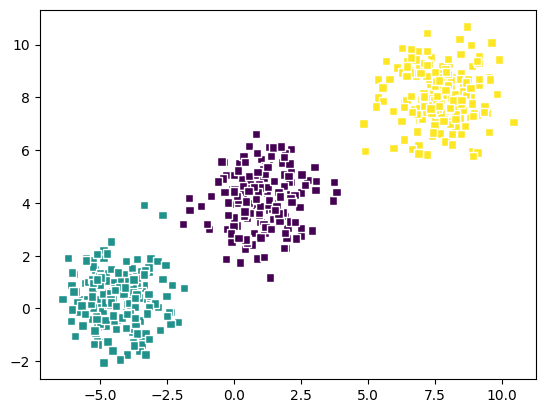

In [1]:
# original method, use numpy to implement
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log
import copy

## Hyper-paramters definition
LR = 0.05
EPOCH = 20
'''
numpy.random.normal(loc=0.0, scale=1.0, size=None)  
loc:float 概率分布的均值，对应着整个分布的中心center
scale:float概率分布的标准差，对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高
size:int or tuple of ints
我们更经常会用到np.random.randn(size)所谓标准正太分布（μ=0, σ=1），对应于np.random.normal(loc=0, scale=1, size)
'''
THETA = np.random.normal(0, 0.1, size=(3,3)).reshape(3, 3) # learnable parameters #和上述公式中表述的一样，为列向量组合而成的矩阵
# https://www.jianshu.com/p/069d8841bd8e make_blobs函数是为聚类产生数据集
X, Y = make_blobs(n_samples=600, centers=3, n_features=2, random_state=3)
print(X.shape, Y.shape)
# plt.scatter(X[:, 0], X[:, 1], c=Y)
# plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, edgecolors='white', marker='s')
plt.show()

X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

[1/20] loss is: 92.61701043022114
[2/20] loss is: 41.38712001322031
[3/20] loss is: 32.70813079961782
[4/20] loss is: 26.95700278906443
[5/20] loss is: 22.719074880715258
[6/20] loss is: 19.55606034508767
[7/20] loss is: 17.157352074840333
[8/20] loss is: 15.304130200953017
[9/20] loss is: 13.847470955508832
[10/20] loss is: 12.681056335546428
[11/20] loss is: 11.727450331954792
[12/20] loss is: 10.931356104558194
[13/20] loss is: 10.254078410206985
[14/20] loss is: 9.668593333017522
[15/20] loss is: 9.155759130032143
[16/20] loss is: 8.701706332978276
[17/20] loss is: 8.296128800377474
[18/20] loss is: 7.931177747438058
[19/20] loss is: 7.600739370079159
[20/20] loss is: 7.299954199099987
THETA [[ 3.78130734  0.34763698 -4.0333719 ]
 [ 0.44964144 -3.13714972  2.78159912]
 [ 0.62486146 -0.63897881  0.43461416]] (60,)


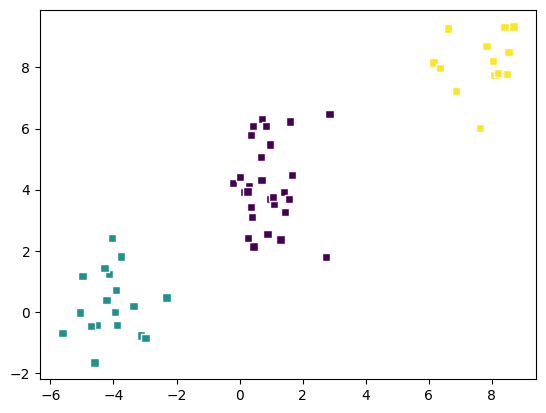

In [2]:
## 2. Make a hypothesis
# theta (3,3) x(3，1)
import numpy as np

# Softmax概率计算，基于SGD单个样本的计算
def hypothesis(x, THETA):
    x = np.reshape(x, (3, 1))
    temp = np.matmul(THETA.T, x)
    temp = np.exp(temp)
    denominator = np.sum(temp)
    hypothesis = temp / denominator # normalize into 1 return 
    return hypothesis

## 3. Loss definition，h_x的shape为[3,1]
def compute_loss(x, y,THETA):
    loss = 0
    x = np.reshape(x, (3, 1))
    h_x = hypothesis(x, THETA)    #hypothesis (3, 1)
    label = y
    loss += (-np.log(h_x[label][0] + 0.0000001))  # loss = - 1{y=k} * log(p(y))
    #print(f'loss = {loss}')
    return loss

## 4. Parameters updating
def update_parameters(THETA, x, y):
    x = np.reshape(x, (3, 1))
    #y = np.reshape(y, (3, 1))
    
    h_x = hypothesis(x, THETA)
    label = y
    # 参数更新规则具体详见ppt中的说明或上面的公式，由于梯度有负号，更新规则负负得正，所以在此处更新时表达式后面为正号
    for k in range(3):
        indicator_val = 1 if label == k else 0
        THETA[:, k] = THETA[:, k]+LR*(indicator_val-h_x[k][0])*x[:,0]
    return THETA

for epoch in range(EPOCH):
    #LR = LR * (1 / (1 + DECAY_RATE * epoch))
    i = 0 # retrieve H_x
    loss = 0
    for x,y in zip(X_train,Y_train):
        loss += compute_loss(x, y, THETA)
        #print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss))
        THETA = update_parameters(THETA, x, y)
    print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss))

i = 0
print('THETA', THETA, Y_test.shape)
H_test = np.zeros((X_test.shape[0], X_test.shape[1]))
#H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i] = hypothesis(x, THETA).T
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=np.argmax(H_test, axis=1), edgecolors='white', marker='s')
plt.show()

In [7]:
print(X_train.shape)

(540, 3)


[1/100] loss is: 158.64259649453635
[2/100] loss is: 43.79754199088418
[3/100] loss is: 86.37980188219522
[4/100] loss is: 46.855269150454866
[5/100] loss is: 29.922506324699057
[6/100] loss is: 43.476901505766065
[7/100] loss is: 23.38222945552819
[8/100] loss is: 28.953552369448623
[9/100] loss is: 10.240980875473587
[10/100] loss is: 7.706053004773441
[11/100] loss is: 11.11730251114659
[12/100] loss is: 8.009225666764406
[13/100] loss is: 8.417449733554589
[14/100] loss is: 15.87827815137313
[15/100] loss is: 6.223466858744404
[16/100] loss is: 9.363186211360794
[17/100] loss is: 5.709317741078912
[18/100] loss is: 5.353407985550361
[19/100] loss is: 6.71406004704416
[20/100] loss is: 5.404411690035232
[21/100] loss is: 6.1063274050152625
[22/100] loss is: 5.267000544169731
[23/100] loss is: 4.690486533054402
[24/100] loss is: 4.210001575764718
[25/100] loss is: 4.922837012948339
[26/100] loss is: 4.346951350829265
[27/100] loss is: 4.756713860673975
[28/100] loss is: 3.58968147307

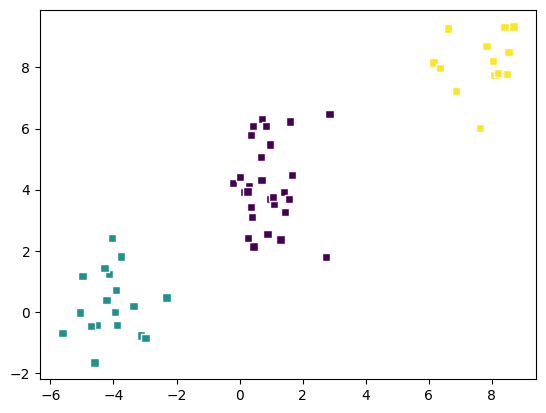

In [3]:
# mini batch算法版本
THETA = np.random.normal(0, 0.1, size=(3,3)).reshape(3, 3) # learnable parameters #和上述公式中表述的一样，为列向量组合而成的矩阵
EPOCH = 100
LR = 0.5

def hypothesis_batch(X, THETA):
    X = np.reshape(X, (-1, 3))
    #temp = np.matmul(THETA.T, x)
    #temp = np.exp(temp)
    # N*3 3*3  -》 N*3（N为样本的数目），3为类别数目
    temp = X @ THETA
    temp = np.exp(temp)
    denominator = np.sum(temp, axis = 1)
    hypothesis = temp / denominator[:, np.newaxis] # normalize into 1return 
    return hypothesis

def predict(x, THETA):
    x = np.reshape(x, (-1, 3))
    h_x = hypothesis_batch(x, THETA)
    return h_x[0]
# def compute_loss_batch(X, Y,THETA):#X为n*3
#     X= np.reshape(X, (-1, 3))
#     #Y = np.reshape(y, (-1, 1))     # 
#     h_X = hypothesis_batch(X, THETA)    # hypothesis N*3
#     #label = np.argmax(y, axis=0)  # the category of prediction
#     loss = (-np.log(h_X[:, Y] + 0.0000001)).mean()  # loss = - y * log(y')
#     return loss

def update_parameters_batch(THETA, x, y):
    x = np.reshape(x, (-1, 3))
    y = np.reshape(y, (-1))
    
    h_x = hypothesis_batch(x, THETA)
    # for row, index in zip(h_x, y):
    #     loss = -np.mean(np.log(h_x[:, y]+ 0.0000001)) # loss = - y * log(y')
    #loss = -np.log(h_x[:, y]+ 0.0000001)# loss = - y * log(y')
    loss = np.sum(-np.log(h_x[np.arange(h_x.shape[0]), y]+0.0000001))
    #print(f'h_x[:, y]: {h_x[:, y]}, loss: {loss} , y:{y}')
    for k in range(3):
        indicator = y == k
        indicator = np.array([int(b) for b in indicator])
        grad = (indicator-h_x[:, k])[:,np.newaxis] * x
        grad = np.mean(grad, axis= 0)
        THETA[:, k ] = THETA[:, k]+LR*grad

    return THETA, loss

for epoch in range(EPOCH):
    #LR = LR * (1 / (1 + DECAY_RATE * epoch))
    i = 0 # retrieve H_x
    batch_size = 8
    iterations = len(X_train) // batch_size
    idxs = np.array(list(range(len(X_train))), np.int32)
    np.random.shuffle(idxs)
    loss = 0
    #print(X_train.shape, Y_train.shape)
    for iter in range(iterations):
        X = X_train[idxs[iter*batch_size:(iter+1)*batch_size],:]
        Y = Y_train[idxs[iter*batch_size:(iter+1)*batch_size]]
        #print(X.shape, Y.shape)
        THETA, loss_batch = update_parameters_batch(THETA, X, Y)
        loss += loss_batch
        #print(loss_batch)
    print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss))


i = 0
print('THETA', THETA, Y_test.shape)
H_test = np.zeros((X_test.shape[0], X_test.shape[1]))
#H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i] = predict(x, THETA)
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=np.argmax(H_test, axis=1), edgecolors='white', marker='s')
plt.show()

References:
- http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/
- 